## Part 2: Analyze the data¶

1. Social Media Data Analysis     
2. Data Visualization 

### Social Media Data Analysis - For IRCC Tweets

Focus on analyzing:

    1. Most retweeted words
    2. IRCC tweets

In [1]:
# !python -m spacy download en_core_web_lg

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import spacy
nlp = spacy.load('en_core_web_lg')
import seaborn as sns

In [3]:
#loading ircc data to a DataFrame
ircc_df = pd.read_csv("ircc_df.csv")

In [4]:
ircc_df.head()

,Unnamed: 0,User,Tweet
0,0,CitImmCanada,"@DenysProd 2/2 For case-specific information, ..."
1,1,CitImmCanada,@DenysProd 1/2 Hi. CUAET electronic visa appli...
2,2,CitImmCanada,"@eireenien 2/2 For case-specific information, ..."
3,3,CitImmCanada,@eireenien 1/2 Hi. CUAET electronic visa appli...
4,4,CitImmCanada,Our online services were recently unavailable....


### 2. IRCC Tweets

In [5]:
#sentiment analysis
import matplotlib.pyplot as plt
import re
import spacy
nlp =  spacy.load('en_core_web_lg')
import seaborn as sns

In [6]:
#generating a list of sentences from the content of DataFrame ircc_df
sentence_list = [sentence for sentence in ircc_df.Tweet]
print(sentence_list)

['@DenysProd 2/2 For case-specific information, please use our web form. The information we need you to include depends on the reason you’re contacting us https://t.co/V2e3FnXl21. You can also call us at 1-613-321-4243.', '@DenysProd 1/2 Hi. CUAET electronic visa applications will be processed within 14 days of receipt of a complete application, for standard, non complex cases. Note: applications that include an open work permit, or study permit, will likely take longer.', '@eireenien 2/2 For case-specific information, please use our web form. The information we need you to include depends on the reason you’re contacting us https://t.co/V2e3FnXl21. You can also call us at 1-613-321-4243.', '@eireenien 1/2 Hi. CUAET electronic visa applications will be processed within 14 days of receipt of a complete application, for standard, non complex cases. Note: applications that include an open work permit, or study permit, will likely take longer.', 'Our online services were recently unavailabl

In [7]:
#splitting the list of sentences to a list of sentences containing a list of words and putting 
#all the words collectively into one list.

word_lines = []
for sentence in sentence_list:
    #print("sentence: ", sentence)
    words = sentence.split()
    #print("words: ", words)
    for r in words:
        word_lines.append(r)

print("word_lines: ", word_lines)

word_lines:  ['@DenysProd', '2/2', 'For', 'case-specific', 'information,', 'please', 'use', 'our', 'web', 'form.', 'The', 'information', 'we', 'need', 'you', 'to', 'include', 'depends', 'on', 'the', 'reason', 'you’re', 'contacting', 'us', 'https://t.co/V2e3FnXl21.', 'You', 'can', 'also', 'call', 'us', 'at', '1-613-321-4243.', '@DenysProd', '1/2', 'Hi.', 'CUAET', 'electronic', 'visa', 'applications', 'will', 'be', 'processed', 'within', '14', 'days', 'of', 'receipt', 'of', 'a', 'complete', 'application,', 'for', 'standard,', 'non', 'complex', 'cases.', 'Note:', 'applications', 'that', 'include', 'an', 'open', 'work', 'permit,', 'or', 'study', 'permit,', 'will', 'likely', 'take', 'longer.', '@eireenien', '2/2', 'For', 'case-specific', 'information,', 'please', 'use', 'our', 'web', 'form.', 'The', 'information', 'we', 'need', 'you', 'to', 'include', 'depends', 'on', 'the', 'reason', 'you’re', 'contacting', 'us', 'https://t.co/V2e3FnXl21.', 'You', 'can', 'also', 'call', 'us', 'at', '1-613-

In [8]:
#removing punctuations and fillers - to have only words with letters in them
word_lines = [re.sub(r'[^A-Za-z0-9]+','',x) for x in word_lines]
#print(word_lines)

word_lines_1 = []
for word in word_lines:
    if word != '':
        word_lines_1.append(word)
print("word_lines_1: ", word_lines_1)

word_lines_1:  ['DenysProd', '22', 'For', 'casespecific', 'information', 'please', 'use', 'our', 'web', 'form', 'The', 'information', 'we', 'need', 'you', 'to', 'include', 'depends', 'on', 'the', 'reason', 'youre', 'contacting', 'us', 'httpstcoV2e3FnXl21', 'You', 'can', 'also', 'call', 'us', 'at', '16133214243', 'DenysProd', '12', 'Hi', 'CUAET', 'electronic', 'visa', 'applications', 'will', 'be', 'processed', 'within', '14', 'days', 'of', 'receipt', 'of', 'a', 'complete', 'application', 'for', 'standard', 'non', 'complex', 'cases', 'Note', 'applications', 'that', 'include', 'an', 'open', 'work', 'permit', 'or', 'study', 'permit', 'will', 'likely', 'take', 'longer', 'eireenien', '22', 'For', 'casespecific', 'information', 'please', 'use', 'our', 'web', 'form', 'The', 'information', 'we', 'need', 'you', 'to', 'include', 'depends', 'on', 'the', 'reason', 'youre', 'contacting', 'us', 'httpstcoV2e3FnXl21', 'You', 'can', 'also', 'call', 'us', 'at', '16133214243', 'eireenien', '12', 'Hi', 'CU

In [9]:
#identifying the base word (stem) of a set of words using the Natural Language Toolkit (NLTK)

from nltk.stem.snowball import SnowballStemmer

words1_stemmer = SnowballStemmer(language='english')

#creating a lis to store the base words(stems)
base_word = []
for word1 in word_lines_1:
    base_word.append(words1_stemmer.stem(word1))

print(base_word)

['denysprod', '22', 'for', 'casespecif', 'inform', 'pleas', 'use', 'our', 'web', 'form', 'the', 'inform', 'we', 'need', 'you', 'to', 'includ', 'depend', 'on', 'the', 'reason', 'your', 'contact', 'us', 'httpstcov2e3fnxl21', 'you', 'can', 'also', 'call', 'us', 'at', '16133214243', 'denysprod', '12', 'hi', 'cuaet', 'electron', 'visa', 'applic', 'will', 'be', 'process', 'within', '14', 'day', 'of', 'receipt', 'of', 'a', 'complet', 'applic', 'for', 'standard', 'non', 'complex', 'case', 'note', 'applic', 'that', 'includ', 'an', 'open', 'work', 'permit', 'or', 'studi', 'permit', 'will', 'like', 'take', 'longer', 'eireenien', '22', 'for', 'casespecif', 'inform', 'pleas', 'use', 'our', 'web', 'form', 'the', 'inform', 'we', 'need', 'you', 'to', 'includ', 'depend', 'on', 'the', 'reason', 'your', 'contact', 'us', 'httpstcov2e3fnxl21', 'you', 'can', 'also', 'call', 'us', 'at', '16133214243', 'eireenien', '12', 'hi', 'cuaet', 'electron', 'visa', 'applic', 'will', 'be', 'process', 'within', '14', 'da

In [10]:
#removing stop words from the base words, and putting the remaining base words (exluding stop words) in a list

base_word_no_stopWords = []

for word2 in base_word:
    if word2 not in nlp.Defaults.stop_words:
        base_word_no_stopWords.append(word2)

print(base_word_no_stopWords)

['denysprod', '22', 'casespecif', 'inform', 'pleas', 'use', 'web', 'form', 'inform', 'need', 'includ', 'depend', 'reason', 'contact', 'httpstcov2e3fnxl21', '16133214243', 'denysprod', '12', 'hi', 'cuaet', 'electron', 'visa', 'applic', 'process', '14', 'day', 'receipt', 'complet', 'applic', 'standard', 'non', 'complex', 'case', 'note', 'applic', 'includ', 'open', 'work', 'permit', 'studi', 'permit', 'like', 'longer', 'eireenien', '22', 'casespecif', 'inform', 'pleas', 'use', 'web', 'form', 'inform', 'need', 'includ', 'depend', 'reason', 'contact', 'httpstcov2e3fnxl21', '16133214243', 'eireenien', '12', 'hi', 'cuaet', 'electron', 'visa', 'applic', 'process', '14', 'day', 'receipt', 'complet', 'applic', 'standard', 'non', 'complex', 'case', 'note', 'applic', 'includ', 'open', 'work', 'permit', 'studi', 'permit', 'like', 'longer', 'onlin', 'servic', 'recent', 'unavail', 'sure', 'clear', 'internet', 'browser', 'cach', 'httpstco6cra8svrxw', 'onlin', 'servic', 'help', 'remind', 'onlin', 'serv

In [11]:
#Putting the resulting base words, without punctuations and stop words in a DataFrame
ircc_base_df = pd.DataFrame(base_word_no_stopWords)
print(ircc_base_df)

#getting counts for each word in the dataframe
ircc_df_counts = ircc_base_df[0].value_counts()
ircc_df_counts

                       0
0              denysprod
1                     22
2             casespecif
3                 inform
4                  pleas
...                  ...
5230                book
5231                 art
5232              suppli
5233  httpstco3cm9x0dkfl
5234  httpstco84zhbvxkpr

[5235 rows x 1 columns]


canada                181
program               116
process               113
inform                113
pleas                 113
                     ... 
winter                  1
ridg                    1
mission                 1
tube                    1
httpstco84zhbvxkpr      1
Name: 0, Length: 962, dtype: int64

### Data Visualization

C:\Users\jngai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


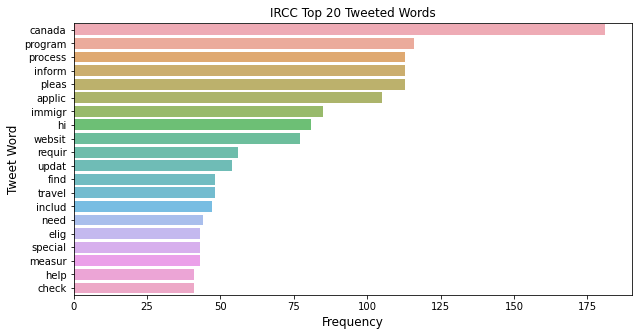

In [12]:
#Plotting a graph showing 20 top retweeted words
ircc_to_plot_df = ircc_df_counts[:20,]
#retweeted_df.plot()

sns.set_palette("pastel")

plt.figure(figsize=(10,5))
sns.barplot(ircc_to_plot_df.values, ircc_to_plot_df.index, alpha=0.8)
plt.title('IRCC Top 20 Tweeted Words')
plt.ylabel('Tweet Word', fontsize=12)
plt.xlabel('Frequency', fontsize=12)
plt.show()

References:    

https://seaborn.pydata.org/tutorial/categorical.html   
https://www.codecademy.com/article/seaborn-design-ii   
https://www.youtube.com/watch?v=bNDRiaFyLrs&t=820s     
https://www.coursera.org/learn/social-media-data-analytics    
https://www.youtube.com/watch?v=FmbEhKSpR7M&t=330s   
https://www.youtube.com/watch?v=uPKnSq6TaAk    